# Programming for Data Analytics - Assignment 2 - weather

************************
*Task 02 of the assessment - Temperature over time* <img src="https://st4.depositphotos.com/27392032/40208/i/450/depositphotos_402081038-stock-photo-temperature-logo-shadow-warm-temperature.jpg" width=3% height=3%>
************************

Create a jupyter notebook called assignment2-weather.ipynb that has a nice plot of the temperature over time ( "dryBulbTemperature_Celsius" ). 

Marks will be give for:

Completing the assignment
How nice the plot looks
You may use PANDAS if you wish to read in the data

********************

Import nessesary libraries

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Now I need to select the data I need to use. I took the CSV file from PFDA-courseware repository and saved into my repository in `./data_files/` folder. 

After creating a dataframe `df` I decided to check only two columns from the data to see how data is presented `df = pd.read_csv(DATADIR+FILENAME, usecols=names_of_columns)`

I also printed first plot to see how does it look like.

            reportEndDateTime  dryBulbTemperature_Celsius
0   2024-10-02T16:15:00+00:00                   15.944444
1   2024-10-02T16:45:00+00:00                   15.777778
2   2024-10-02T17:00:00+00:00                   15.111111
3   2024-10-02T17:15:00+00:00                   14.277778
4   2024-10-02T17:30:00+00:00                   13.666667
..                        ...                         ...
84  2024-10-03T14:00:00+00:00                   14.611111
85  2024-10-03T14:15:00+00:00                   14.944444
86  2024-10-03T14:30:00+00:00                   14.944444
87  2024-10-03T14:45:00+00:00                   14.944444
88  2024-10-03T15:00:00+00:00                   14.722222

[89 rows x 2 columns]


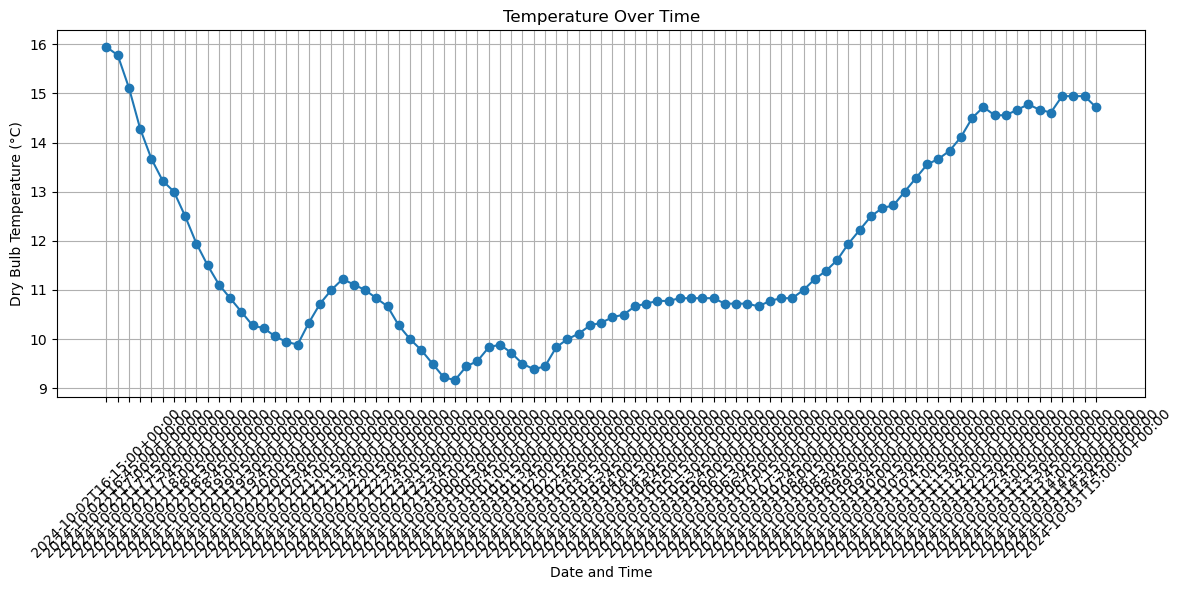

In [70]:


DATADIR = './data_files/'
FILENAME = 'weatherreadings1.csv'
df = pd.read_csv(DATADIR+FILENAME)

names_of_columns=['reportEndDateTime','dryBulbTemperature_Celsius']
df = pd.read_csv(DATADIR+FILENAME, usecols=names_of_columns)
print(df)

# print(df[['reportEndDateTime','dryBulbTemperature_Celsius']]) #double brackets to select muliple columns


plt.figure(figsize=(12, 6))
plt.plot(df['reportEndDateTime'], df['dryBulbTemperature_Celsius'], marker='o', linestyle='-')
plt.title('Temperature Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Dry Bulb Temperature (°C)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


While the y-axis with temperature looks nice, the x-axis with date and time does not look very user friendly and it is not readable, therefore I need to clean my data and remove unnessesary text. 

Since the date range is only two days in October, I can remove '2024', 'T' symbol and '+00:00' as I don't need them in my plot. To do this I am using regular expressions. 

In [71]:
import re # regular expressions library 

#Function to clean the date-time format
def clean_datetime(dt):
    return re.sub(r'2024-|T|\+00:00', '', dt)

df['cleaned_datetime'] = df['reportEndDateTime'].apply(clean_datetime) 

# Save to a new CSV file
df.to_csv('weatherreadings1_cleaned.csv', index=False)  

df_cleaned = pd.read_csv('weatherreadings1_cleaned.csv')

# adding space between date and time
def add_space(row):
    return re.sub(r'(\d{2}-\d{2})(\d{2}:\d{2}:\d{2})', r'\1 \2', row)

# Apply the function to each entry in the relevant column
df_cleaned['cleaned_datetime_space'] = df['cleaned_datetime'].apply(add_space)

# Overwrite the original CSV file
df_cleaned.to_csv('weatherreadings1_cleaned_space.csv', index=False)

Now, I will see how the modified and cleaned columns will look in a plot. 

    dryBulbTemperature_Celsius cleaned_datetime_space
0                    15.944444         10-02 16:15:00
1                    15.777778         10-02 16:45:00
2                    15.111111         10-02 17:00:00
3                    14.277778         10-02 17:15:00
4                    13.666667         10-02 17:30:00
..                         ...                    ...
84                   14.611111         10-03 14:00:00
85                   14.944444         10-03 14:15:00
86                   14.944444         10-03 14:30:00
87                   14.944444         10-03 14:45:00
88                   14.722222         10-03 15:00:00

[89 rows x 2 columns]


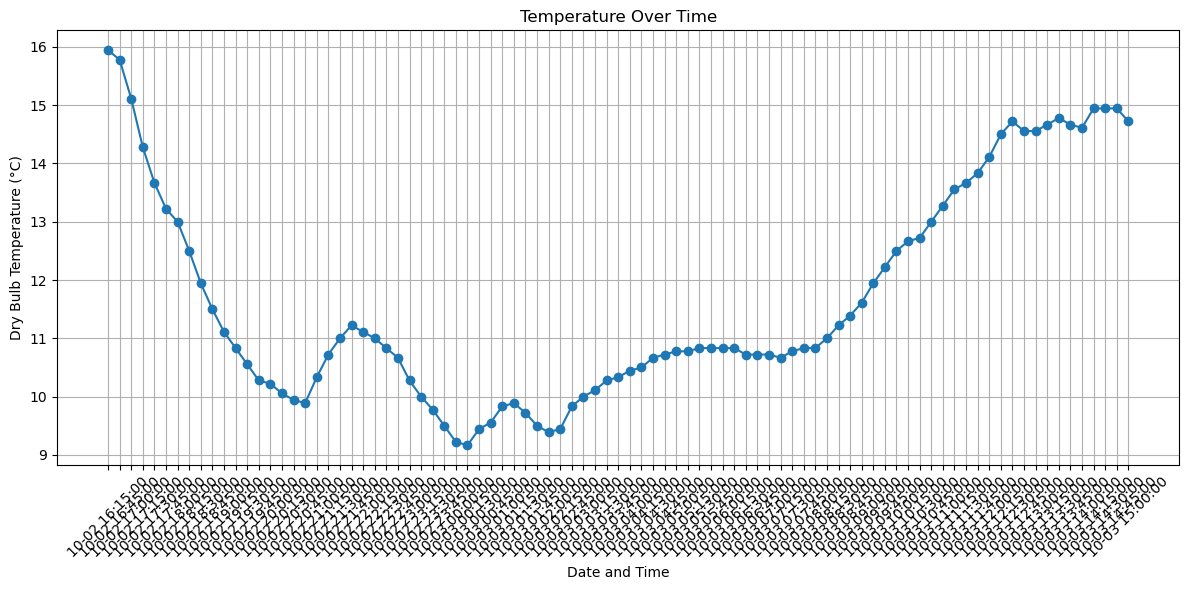

In [72]:
names_of_columns=['cleaned_datetime_space','dryBulbTemperature_Celsius']
df = pd.read_csv('weatherreadings1_cleaned_space.csv', usecols=names_of_columns)
print(df)

# print(df[['reportEndDateTime','dryBulbTemperature_Celsius']]) #double brackets to select muliple columns


plt.figure(figsize=(12, 6))
plt.plot(df['cleaned_datetime_space'], df['dryBulbTemperature_Celsius'], marker='o', linestyle='-')
plt.title('Temperature Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Dry Bulb Temperature (°C)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

Since I am happy with the clean data, to make this plot looks nicer I am using scatterplot, because I also want to add a color gradient depending on the temperature `c=df['dryBulbTemperature_Celsius'], cmap='coolwarm', marker='o')` and plot a line that will be connecting these points `ax.plot(df['cleaned_datetime_space'], df['dryBulbTemperature_Celsius'], color='gray', linewidth=1, alpha=0.6)`

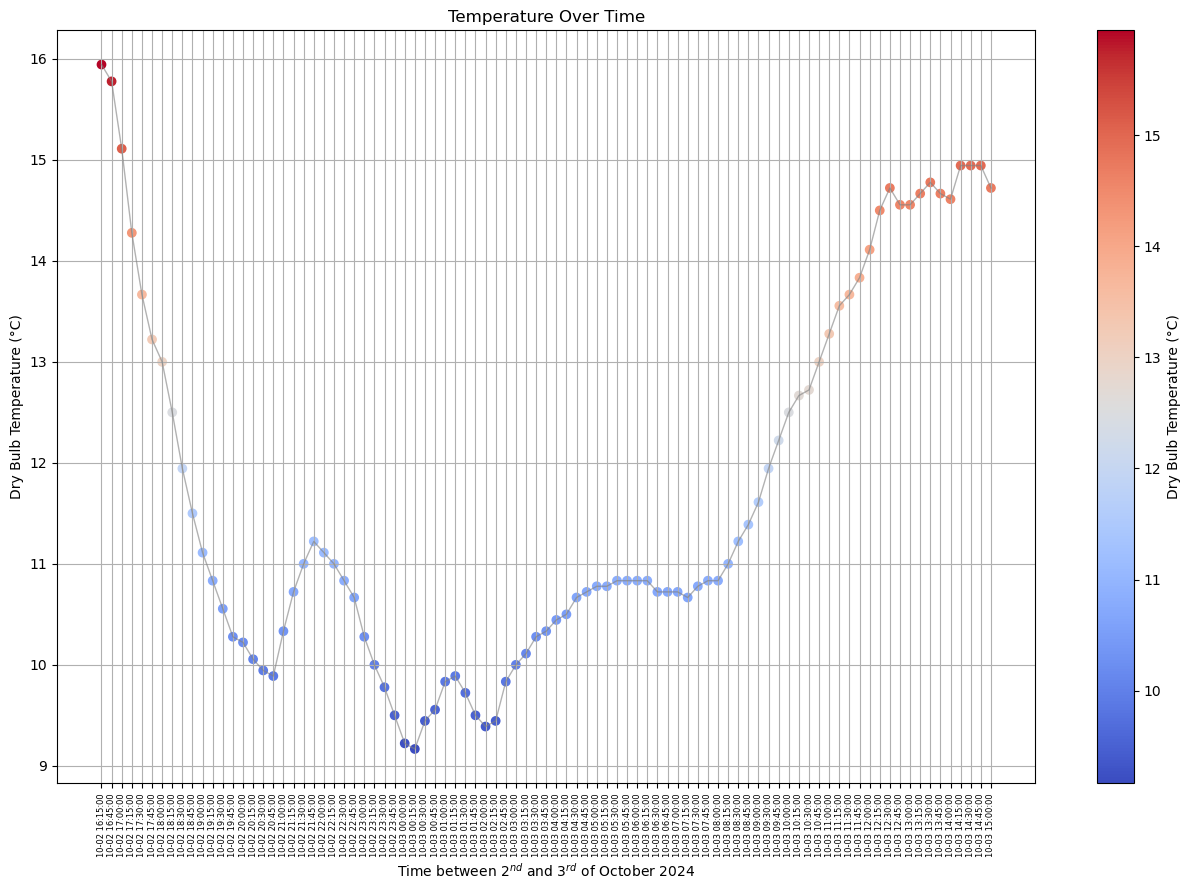

In [73]:


pd.read_csv('weatherreadings1_cleaned_space.csv', usecols=names_of_columns)

fig, ax = plt.subplots(figsize=(13, 9))

# Create a scatter plot with colors based on temperature
scatter = ax.scatter(df['cleaned_datetime_space'], df['dryBulbTemperature_Celsius'], 
                     c=df['dryBulbTemperature_Celsius'], cmap='coolwarm', marker='o') 

# Adding a line connecting the dots
ax.plot(df['cleaned_datetime_space'], df['dryBulbTemperature_Celsius'], color='gray', linewidth=1, alpha=0.6)


# Adding a color bar
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Dry Bulb Temperature (°C)')

# Adding titles and labels
ax.set_title('Temperature Over Time')
ax.set_xlabel('Time between 2$^{nd}$ and 3$^{rd}$ of October 2024')
ax.set_ylabel('Dry Bulb Temperature (°C)')

# Changing the number to set desired font size
ax.tick_params(axis='x', labelsize=6)  

# rotation
plt.xticks(rotation=90)
plt.tight_layout()
ax.grid()



As an additional excercise I wanted to plot this data, but using `datetime` object. 

            reportEndDateTime  dryBulbTemperature_Celsius
0   2024-10-02T16:15:00+00:00                   15.944444
1   2024-10-02T16:45:00+00:00                   15.777778
2   2024-10-02T17:00:00+00:00                   15.111111
3   2024-10-02T17:15:00+00:00                   14.277778
4   2024-10-02T17:30:00+00:00                   13.666667
..                        ...                         ...
84  2024-10-03T14:00:00+00:00                   14.611111
85  2024-10-03T14:15:00+00:00                   14.944444
86  2024-10-03T14:30:00+00:00                   14.944444
87  2024-10-03T14:45:00+00:00                   14.944444
88  2024-10-03T15:00:00+00:00                   14.722222

[89 rows x 2 columns]


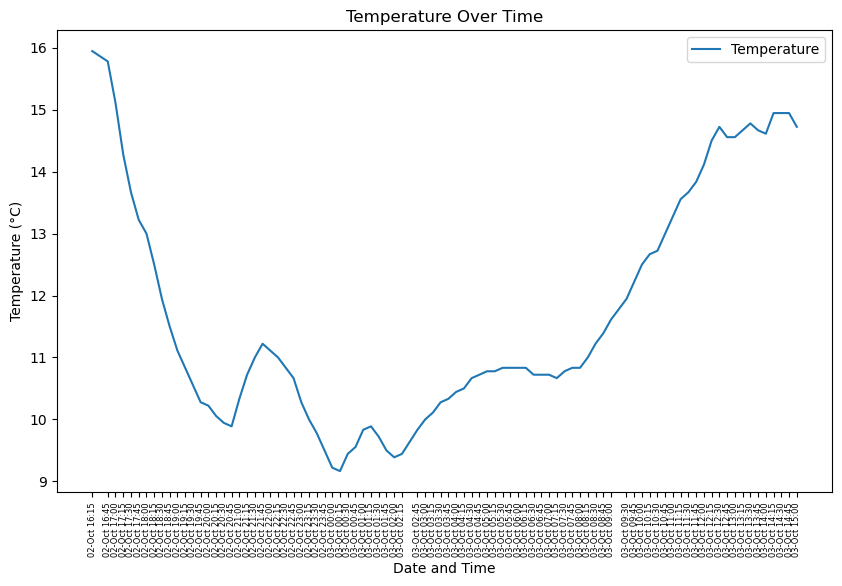

In [74]:
DATADIR = './data_files/'
FILENAME = 'weatherreadings1.csv'
df = pd.read_csv(DATADIR+FILENAME)

names_of_columns=['reportEndDateTime','dryBulbTemperature_Celsius']
df = pd.read_csv(DATADIR+FILENAME, usecols=names_of_columns)
print(df)

# Convert the 'reportEndDateTime' to datetime format
df['datetime'] = pd.to_datetime(df['reportEndDateTime'])

# Split 'datetime' into separate date and time columns
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

# Plot Temperature over Time
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['dryBulbTemperature_Celsius'], label='Temperature')
plt.xlabel('Date and Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.xticks(df['datetime'], df['datetime'].dt.strftime('%d-%b %H:%M'), rotation=90, fontsize=6)

plt.legend()
plt.show()

Now I would like to use scatterplot similar as above. 

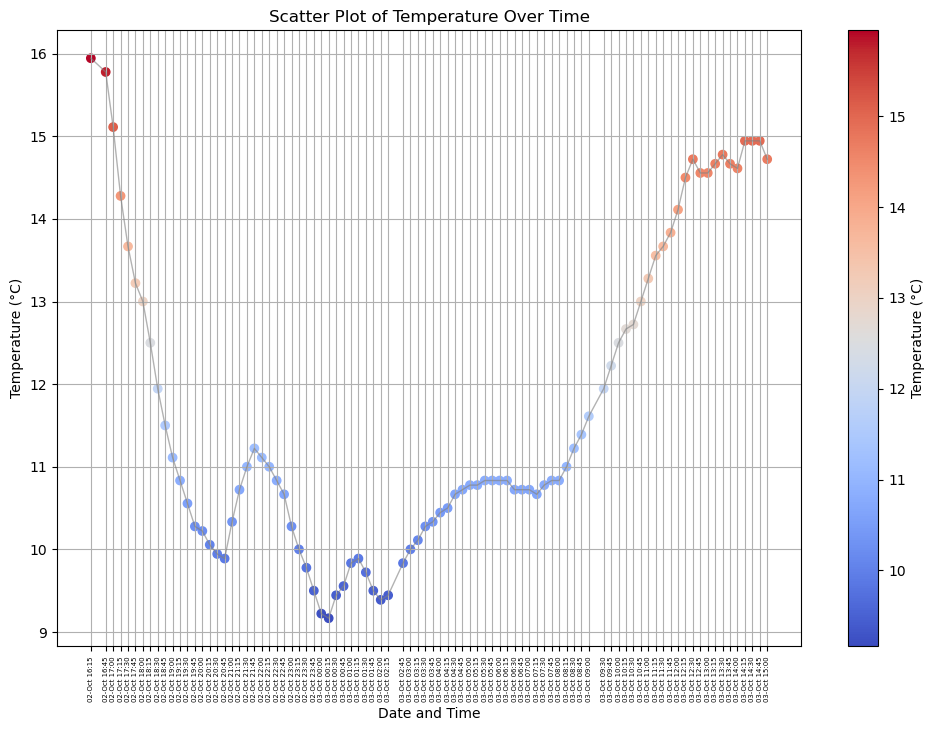

In [ ]:
# Creating scatterplot, using 'dryBulbTemperature_Celsius' for color mapping
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['datetime'], df['dryBulbTemperature_Celsius'], c=df['dryBulbTemperature_Celsius'], cmap='coolwarm')

# adding color bar to show the temperature scale
plt.colorbar(scatter, label='Temperature (°C)')

# adding line connecting the dots
plt.plot(df['datetime'], df['dryBulbTemperature_Celsius'], color='gray', linewidth=1, alpha=0.6)


plt.xlabel('Date and Time')
plt.ylabel('Temperature (°C)')
plt.title('Scatter Plot of Temperature Over Time')
plt.xticks(df['datetime'], df['datetime'].dt.strftime('%d-%b %H:%M'), rotation=90, fontsize=5) #df['datetime'].dt.strftime('%d-%b %H:%M'): This formats the datetime values to display 
                                                                                                #as day month hour
plt.grid(True)
plt.show()

*****************
End